In [ ]:
%matplotlib widget

import cv2 as cv
import open3d as o3d
import matplotlib.pyplot as plt
import json
import numpy as np

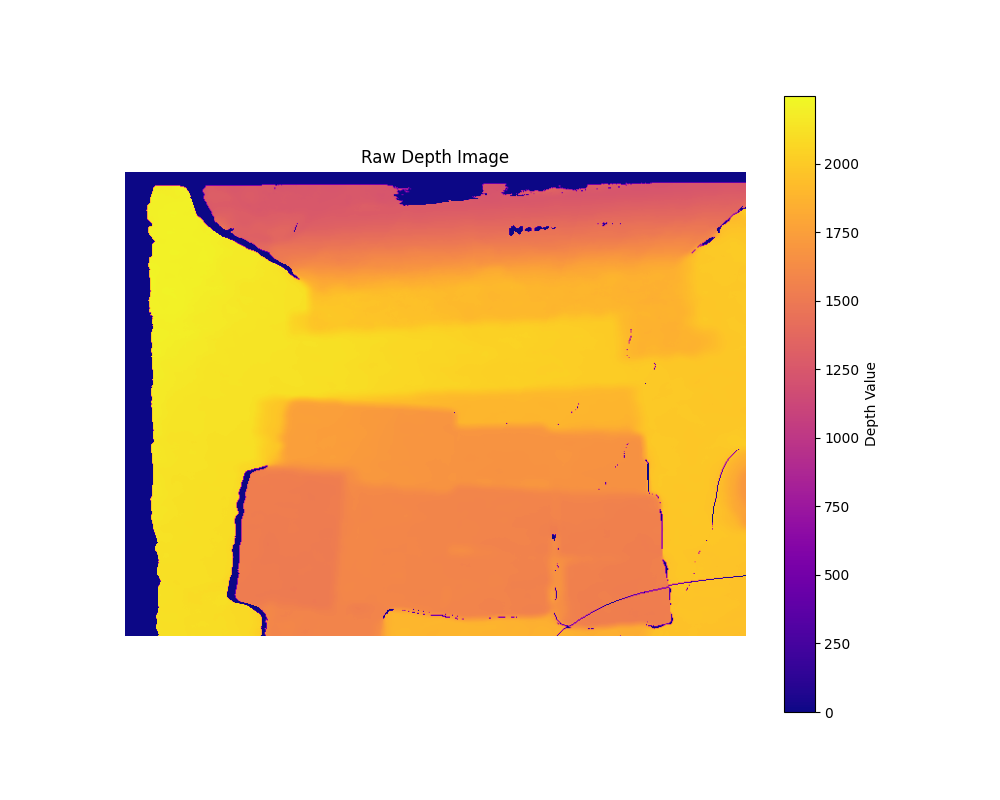

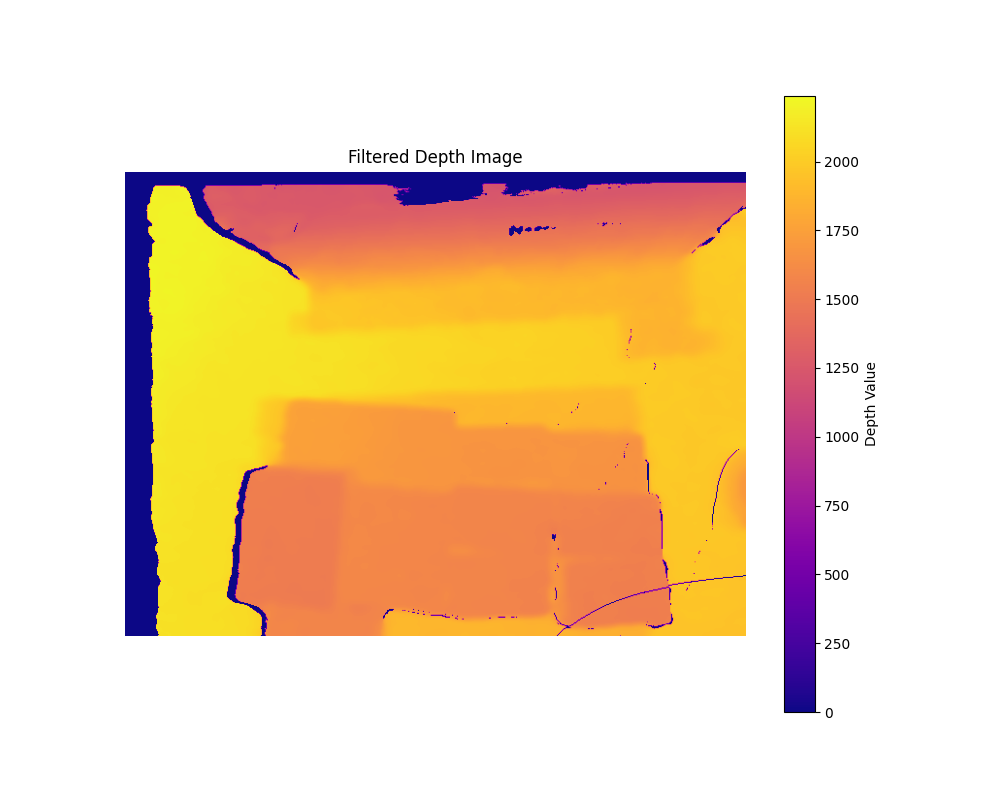

In [ ]:
# Load the depth image as is (preserve bit depth and channels)
depth_image = cv.imread("../data/small_box/raw_depth.png", cv.IMREAD_UNCHANGED)

# Visualize the depth image with a suitable colormap
plt.figure(figsize=(10, 8))
plt.imshow(depth_image, cmap='plasma')
plt.colorbar(label='Depth Value')
plt.title('Raw Depth Image')
plt.axis('off')
plt.show()

depth_filtered = cv.bilateralFilter(depth_image.astype(np.float32), d=5, sigmaColor=50, sigmaSpace=50)
depth_filtered = depth_filtered.astype(depth_image.dtype)

# Visualize filtered depth
plt.figure(figsize=(10, 8))
plt.imshow(depth_filtered, cmap='plasma')
plt.colorbar(label='Depth Value')
plt.title('Filtered Depth Image')
plt.axis('off')
plt.show()


In [ ]:
#read camera intrinsics from json file
with open("../data/small_box/intrinsics.json", "r") as f:
    camera_intrinsics = json.load(f)

print(camera_intrinsics)

fx = camera_intrinsics["fx"]
fy = camera_intrinsics["fy"]
cx = camera_intrinsics["cx"]
cy = camera_intrinsics["cy"]
width = camera_intrinsics["width"]
height = camera_intrinsics["height"]

{'width': 640, 'height': 480, 'fx': 607.59228515625, 'fy': 606.738037109375, 'cx': 315.66650390625, 'cy': 249.53839111328125}


AttributeError: 'open3d.cpu.pybind.geometry.PointCloud' object has no attribute 'clone'

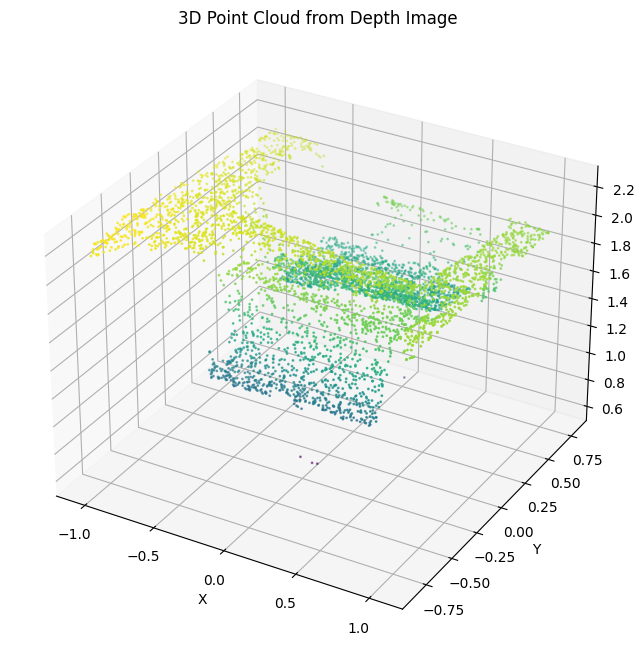

In [ ]:
# Convert depth image to point cloud
height, width = depth_image.shape
xx, yy = np.meshgrid(np.arange(width), np.arange(height))
valid = (depth_image > 0)  # Mask for valid depth pixels

# Use intrinsics to convert to 3D points
z = depth_image[valid] / 1000.0  # Convert to meters
x = (xx[valid] - cx) * z / fx
y = (yy[valid] - cy) * z / fy
points = np.vstack((x, y, z)).T

# Create Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Visualize point cloud using matplotlib (without X11)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Downsample points for visualization
if len(points) > 5000:
    idx = np.random.choice(len(points), 5000, replace=False)
    points_sample = points[idx]
else:
    points_sample = points

ax.scatter(points_sample[:, 0], points_sample[:, 1], points_sample[:, 2],
           c=points_sample[:, 2], cmap='viridis', s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud from Depth Image')
plt.show()
